In [2]:
from neo4j import GraphDatabase
import pandas as pd
import numpy as np

In [3]:
uri = "bolt://34.101.73.40:7687"
username = "neo4j"
password = "unej1234"

driver = GraphDatabase.driver(uri, auth=(username, password))

In [4]:
def extract_node_properties():
    with driver.session() as session:
        # Cypher query to fetch node properties
        query = """
        MATCH (n)
        RETURN n.Vector AS vector, n.label AS label, labels(n) AS kelas, n.abstract AS keterangan
        """
        result = session.run(query)
        # Extract properties and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        return df


In [5]:
node_df = extract_node_properties()
cleaned_kelas = node_df['kelas'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
node_df['kelas'] = cleaned_kelas
node_df

,vector,label,kelas,keterangan
0,"[-0.48007139563560486, 0.6460448503494263, -0....",Metalaxyl,[Fungisida],Metalaxyl adalah sejenis fungisida yang diguna...
1,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],"Penyakit gosong bulir padi, juga dikenal sebag..."
2,"[0.022821197286248207, 0.3413693904876709, -0....",Acidovorax avenae subsp. avenae,[PatogenPadi],Acidovorax avenae subsp. avenae adalah bakteri...
3,"[-0.0965781956911087, 0.03939099982380867, -0....",Tanaman layu,[Gejala],Gejala layu pada tanaman padi adalah tanda yan...
4,"[0.39404162764549255, -0.3328622579574585, 0.4...",Bibit mati,[Gejala],Gejala kematian bibit padi dapat terlihat dala...
...,...,...,...,...
100,"[0.6989031434059143, -0.3856666088104248, 0.55...",Bacillus thuringiensis var. israelensis,[Pestisida],Bacillus thuringiensis var. israelensis (Bti) ...
101,"[0.4118303656578064, -0.5445472598075867, -0.1...",Belalang Sawah,[HamaPadi],"Belalang sawah, atau Nilaparvata lugens, adala..."
102,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],Penyakit bakteri garis daun pada padi disebabk...
103,"[-0.24614253640174866, 0.1480824500322342, -0....",Fusarium spp.,[PatogenPadi],Fusarium spp. adalah kelompok jamur patogen ya...


In [6]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
        MATCH (n)-[r]->(m)
        RETURN n.Vector AS source_vector, n.label AS source_label, labels(n) AS source_class, 
               type(r) AS relationship_type,
               m.Vector AS target_vector, m.label AS target_label, labels(m) AS target_class
        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],diberikanFungisida,"[-0.0959160327911377, 0.14652732014656067, 0.0...",Pyraclostrobin,[Fungisida]
1,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.10879369080066681, 0.07831495255231857, -0....",Bulir mengalami kerusakan,[Gejala]
2,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.6842259168624878, -0.09251340478658676, 0.0...",Bulir pecah,[Gejala]
3,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],terkenaPatogen,"[0.24190634489059448, 0.04473293945193291, 0.0...",Tilletia barclayana,[PatogenPadi]
4,"[0.26170042157173157, 0.07159162312746048, 0.0...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.2921145260334015, -0.051839686930179596, -0...",Bulir terdapat bercak,[Gejala]
...,...,...,...,...,...,...,...
142,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],memilikiGejala,"[-0.3528200387954712, -0.11492333561182022, 0....",Daun mengering,[Gejala]
143,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],diberikanBakterisida,"[-0.43456384539604187, 0.053754474967718124, 0...",Fosfit,[Bakterisida]
144,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],diberikanBakterisida,"[-0.5201900601387024, -0.21731899678707123, -0...",Streptomisin,[Bakterisida]
145,"[-0.4613795280456543, 0.18603742122650146, 0.3...",Bakteri Garis Daun,[PenyakitPadi],memilikiGejala,"[-0.8089390993118286, -0.32538989186286926, 0....",Malai mengalami kerusakan,[Gejala]


In [7]:
#Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)


Accuracy: 0.6888888888888889


In [8]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Encode categorical variables if needed
label_encoder = LabelEncoder()
X_encoded = X.copy()  # Make a copy of X to avoid modifying the original data
for i in range(X_encoded.shape[1]):  # Iterate over columns (features)
    X_encoded[:, i] = label_encoder.fit_transform(X_encoded[:, i])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)


Accuracy: 0.7555555555555555


In [9]:
#Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, nn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", nn_accuracy)


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.0993 - loss: 2.1349    
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.1867 - loss: 1.9477
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.2480 - loss: 1.8416
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.3373 - loss: 1.7486
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.4819 - loss: 1.6701
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.4812 - loss: 1.5540
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.6051 - loss: 1.3496
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.4716 - loss: 1.3985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.5293 - loss: 1.2902
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.4339 - loss: 1.2811
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4340 - loss: 1.2478 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.4735 -

In [10]:
#CNN

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

# Reshape the input data to be suitable for a 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, cnn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", cnn_accuracy)


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.3015 - loss: 1.9940
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.4701 - loss: 1.8298
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.3766 - loss: 1.8109
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.3978 - loss: 1.7503
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.4841 - loss: 1.5783
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.4255 - loss: 1.5405
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.4707 - loss: 1.5099
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.3900 - loss: 1.5931
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.4133 - loss: 1.5592
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.3958 - loss: 1.5501
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.4474 - loss: 1.4791
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.4839 - lo

In [11]:
#RNN

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

# Reshape the input data to be suitable for an RNN (assuming sequential data)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN model
model = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(len(np.unique(y_train)), activation='softmax')  # Adjust output units to match the number of unique classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model using the reshaped data
model.fit(X_train_rnn, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model using the reshaped test data
loss, rnn_accuracy = model.evaluate(X_test_rnn, y_test)
print("Accuracy:", rnn_accuracy)


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.2014 - loss: 2.0500
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5595 - loss: 1.9611
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5025 - loss: 1.8778
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.4834 - loss: 1.7901
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.4691 - loss: 1.7187
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.4230 - loss: 1.6782
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.4152 - loss: 1.5887
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4207 - loss: 1.5273
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.4094 - loss: 1.4934
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.4624 - loss: 1.4019
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.4758 - loss: 1.2860
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.4119 - lo

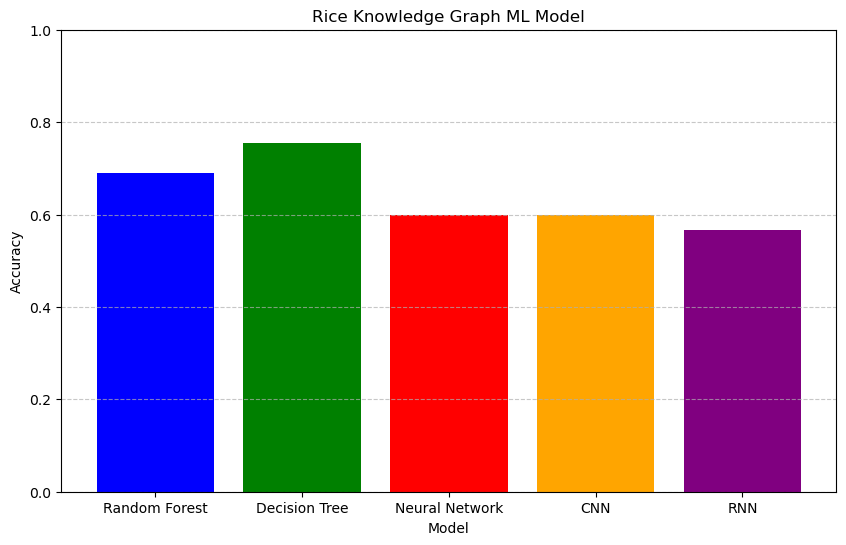

In [12]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores of four other models stored in variables

# Define the model names
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'CNN', 'RNN']

# Define the accuracy scores
accuracy_scores = [rf_accuracy, dt_accuracy, nn_accuracy, cnn_accuracy, rnn_accuracy]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Rice Knowledge Graph ML Model')
plt.ylim(0, 1)  # Set the y-axis limits to ensure all bars are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
